In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.patches as patches
import random

In [ ]:
# extract the zip folder
%%capture
!unzip "/content/drive/Othercomputers/My Mac/Image Segmentation/dataset/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/Othercomputers/My Mac/Image Segmentation/dataset/images"

In [70]:
# load the training images
train_data_path = "/content/drive/Othercomputers/My Mac/Image Segmentation/dataset/images/train-300/data"
train_annotation = "/content/drive/Othercomputers/My Mac/Image Segmentation/dataset/images/train-300/labels.json"
val_data_path = "/content/drive/Othercomputers/My Mac/Image Segmentation/dataset/images/validation-300/data"
val_annotation = "/content/drive/Othercomputers/My Mac/Image Segmentation/dataset/images/validation-300/labels.json"
coco = COCO(train_annotation)

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [3]:
# Get the categories IDs
category_IDs = coco.getCatIds()
categories = coco.loadCats(category_IDs)
print(categories)

[{'id': 0, 'name': 'airplane', 'supercategory': 'vehicle'}, {'id': 1, 'name': 'backpack', 'supercategory': 'accessory'}, {'id': 2, 'name': 'banana', 'supercategory': 'food'}, {'id': 3, 'name': 'baseball bat', 'supercategory': 'sports'}, {'id': 4, 'name': 'baseball glove', 'supercategory': 'sports'}, {'id': 5, 'name': 'bear', 'supercategory': 'animal'}, {'id': 6, 'name': 'bench', 'supercategory': 'outdoor'}, {'id': 7, 'name': 'bicycle', 'supercategory': 'vehicle'}, {'id': 8, 'name': 'bird', 'supercategory': 'animal'}, {'id': 9, 'name': 'boat', 'supercategory': 'vehicle'}, {'id': 10, 'name': 'book', 'supercategory': 'indoor'}, {'id': 11, 'name': 'bottle', 'supercategory': 'kitchen'}, {'id': 12, 'name': 'bowl', 'supercategory': 'kitchen'}, {'id': 13, 'name': 'broccoli', 'supercategory': 'food'}, {'id': 14, 'name': 'bus', 'supercategory': 'vehicle'}, {'id': 15, 'name': 'cake', 'supercategory': 'food'}, {'id': 16, 'name': 'car', 'supercategory': 'vehicle'}, {'id': 17, 'name': 'carrot', 'sup

In [4]:
names_cats = [cats["name"] for cats in categories]
print(len(names_cats), "COCO categories:", " ".join(names_cats))

names_scats = set([cats["supercategory"] for cats in categories])
print(len(names_scats), "COCO supercategories:", " ".join(names_scats))

63 COCO categories: airplane backpack banana baseball bat baseball glove bear bench bicycle bird boat book bottle bowl broccoli bus cake car carrot cat cell phone chair clock cow cup dining table dog donut elephant fire hydrant fork frisbee giraffe handbag horse hot dog kite knife laptop motorcycle oven parking meter person pizza potted plant refrigerator remote sandwich scissors skateboard skis spoon sports ball stop sign suitcase surfboard tennis racket tie traffic light train truck umbrella vase wine glass
12 COCO supercategories: outdoor person food furniture appliance accessory animal electronic vehicle indoor sports kitchen


In [5]:
# Function to get the category name
def get_category_name(class_ID, categories):
    for i in range(len(categories)):
        if categories[i]["id"] == class_ID:
            return categories[i]["name"]
    return "None"

In [6]:
# Print category name
category_name_15 = get_category_name(15, categories)
print(f"The category name is {category_name_15}.")

The category name is cake.


In [7]:
# Print the category and number of images in specific classes.
filter_classes = ["cat","Cake","Person","dog"]

for filter_class in filter_classes:
    category_IDs = coco.getCatIds(catNms=filter_class)
    image_IDs = coco.getImgIds(catIds=category_IDs)
    print(f"Number of images containing {filter_class}: {len(image_IDs)}.")
    print(f"IDs of images containing specified category(ies): {image_IDs}.")

Number of images containing cat: 4.
IDs of images containing specified category(ies): [299, 132, 268, 294].
Number of images containing Cake: 300.
IDs of images containing specified category(ies): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 

{'id': 32, 'file_name': '000000002754.jpg', 'height': 480, 'width': 640, 'license': None, 'coco_url': None}


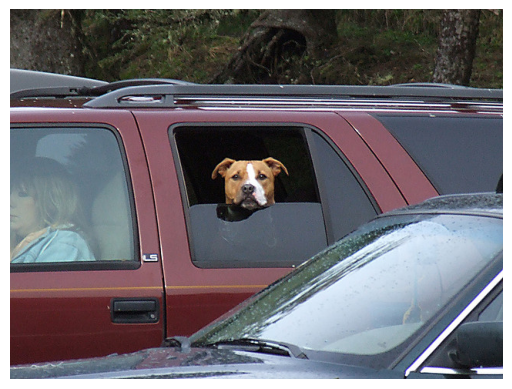

In [9]:
# Print and example Image
example_image = coco.loadImgs(image_IDs[0])[0]
print(example_image)
image = io.imread(f'{train_data_path}/{example_image["file_name"]}')
plt.axis("off")
plt.imshow(image)
plt.show()

In [10]:
# Print the annotation IDs
test_image_annotations_ID = coco.getAnnIds(
    imgIds=example_image["id"], catIds=category_IDs, iscrowd=None
)
print(test_image_annotations_ID)


test_image_annotations = coco.loadAnns(test_image_annotations_ID)
print(test_image_annotations)

[353]
[{'id': 353, 'image_id': 32, 'category_id': 25, 'bbox': [252.09, 190.35, 109.71000000000001, 137.54], 'segmentation': [[350.0, 326.5, 251.5, 325.0, 263.5, 289.0, 278.5, 259.0, 281.0, 256.5, 300.5, 258.0, 279.0, 254.5, 277.5, 221.0, 272.0, 215.5, 269.0, 221.5, 261.5, 220.0, 263.5, 207.0, 274.0, 194.5, 286.0, 192.5, 300.0, 195.5, 339.0, 189.5, 357.5, 205.0, 360.0, 214.5, 351.0, 207.5, 348.5, 213.0, 342.5, 216.0, 343.5, 250.0, 330.5, 257.0, 337.0, 255.5, 339.5, 259.0, 341.5, 285.0, 350.0, 326.5], [305.5, 259.0, 301.5, 259.0, 305.5, 259.0]], 'area': 15089.5134, 'iscrowd': 0, 'supercategory': 'animal'}]


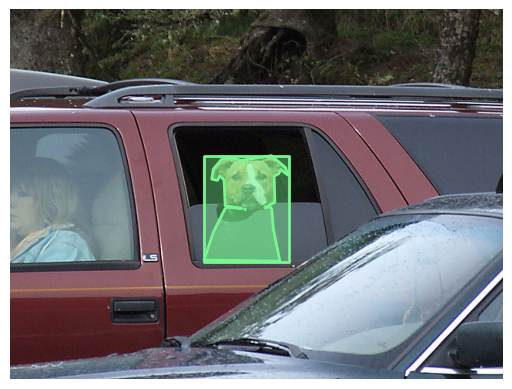

In [11]:
# Show Image with bounding box
plt.imshow(image)
plt.axis("off")
coco.showAnns(test_image_annotations, draw_bbox=True)

In [12]:
#  Get images containing combination of the four target classes.

target_classes = ["cake", "cat", "dog", "person"]
target_classes_IDs = coco.getCatIds(catNms=target_classes)
training_images = []

for class_name in target_classes:
    # Get all images containing target class.
    print(class_name)
    training_images_categories = coco.getCatIds(catNms=class_name)
    training_images_IDs = coco.getImgIds(catIds=training_images_categories)
    training_images += coco.loadImgs(training_images_IDs)

print(f"Number of images with target classes including repetitions: {len(training_images)}.")

cake
cat
dog
person
Number of images with target classes including repetitions: 287.


In [13]:
# Filter out repeated images.

unique_training_images = []

for i in range(len(training_images)):
    if training_images[i] not in unique_training_images:
        unique_training_images.append(training_images[i])

# Shuffle the training data.
random.seed(0)
random.shuffle(unique_training_images)

print(
    f"Number of unique images in training data containing the target classes: {len(unique_training_images)}"
)

Number of unique images in training data containing the target classes: 276


{'id': 66, 'file_name': '000000004736.jpg', 'height': 426, 'width': 640, 'license': None, 'coco_url': None}


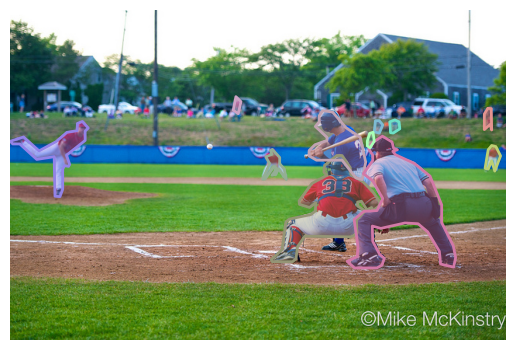

In [15]:
# Show Annotations

training_image = unique_training_images[5]
print(training_image)

image = io.imread(f'{train_data_path}/{training_image["file_name"]}')
plt.axis("off")
plt.imshow(image)

training_image_annotations_ID = coco.getAnnIds(
    imgIds=training_image["id"], catIds=target_classes_IDs, iscrowd=None
)
training_image_annotations = coco.loadAnns(training_image_annotations_ID)
coco.showAnns(training_image_annotations, draw_bbox=False)

plt.show()

In [16]:
mask_example = coco.annToMask(training_image_annotations[0])
print(type(mask_example))
print(mask_example)
print(mask_example.shape)
print(np.max(mask_example))
print(np.min(mask_example))

<class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(426, 640)
1
0


Unique pixel values in the mask: [0. 3.]


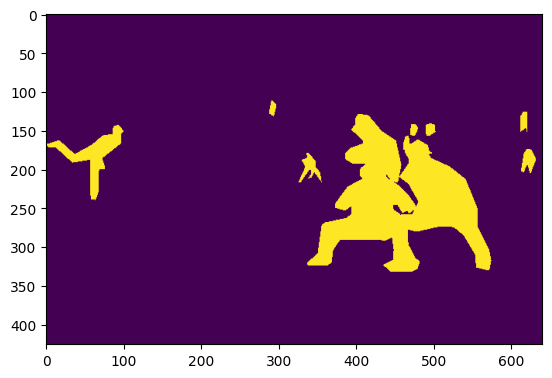

In [17]:
mask = np.zeros((training_image["height"], training_image["width"]))

for i in range(len(training_image_annotations)):
    # Get object category name.
    object_category = get_category_name(
        training_image_annotations[i]["category_id"], categories
    )
    # Assign pixel value based on location in target_classes list.
    pixel_value = target_classes.index(object_category) + 1
    # Assign pixel value to mask based on annToMask output.
    mask = np.maximum(coco.annToMask(training_image_annotations[i]) * 3, mask)

print(f"Unique pixel values in the mask: {np.unique(mask)}")
plt.imshow(mask)
plt.show()

***U-NET***

In [103]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models
from pycocotools.coco import COCO
import skimage.io as io
from tensorflow.keras.metrics import MeanIoU
from tqdm import tqdm

In [104]:
def unet_model(input_size=(128, 128, 3), num_classes=5):
    inputs = tf.keras.Input(input_size)

    def conv_block(x, filters):
        x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
        x = layers.Conv2D(filters, 3, activation='relu', padding='same')(x)
        return x

    def encoder_block(x, filters):
        c = conv_block(x, filters)
        p = layers.MaxPooling2D((2, 2))(c)
        return c, p

    def decoder_block(x, skip, filters):
        x = layers.Conv2DTranspose(filters, (2, 2), strides=2, padding='same')(x)
        x = layers.concatenate([x, skip])
        x = conv_block(x, filters)
        return x

    # Encoder
    c1, p1 = encoder_block(inputs, 64)
    c2, p2 = encoder_block(p1, 128)
    c3, p3 = encoder_block(p2, 256)
    c4, p4 = encoder_block(p3, 512)

    # Bottleneck
    bn = conv_block(p4, 1024)

    # Decoder
    d1 = decoder_block(bn, c4, 512)
    d2 = decoder_block(d1, c3, 256)
    d3 = decoder_block(d2, c2, 128)
    d4 = decoder_block(d3, c1, 64)

    outputs = layers.Conv2D(num_classes, (1, 1), activation='softmax')(d4)

    return tf.keras.Model(inputs=[inputs], outputs=[outputs])

In [146]:
# class CocoDataset(tf.keras.utils.Sequence):
#     def __init__(self, image_dir, annotation_path, categories, image_size=(128, 128), batch_size=8):
#         self.coco = COCO(annotation_path)
#         self.cat_ids = self.coco.getCatIds(catNms=categories)
#         self.img_ids = list(set(sum([self.coco.getImgIds(catIds=[cat]) for cat in self.cat_ids], [])))
#         self.images = self.coco.loadImgs(self.img_ids)
#         self.image_dir = image_dir
#         self.categories = categories
#         self.batch_size = batch_size
#         self.image_size = image_size
#         self.num_classes = len(categories) + 1  # +1 for background

#     def __len__(self):
#         return len(self.images) // self.batch_size

#     def __getitem__(self, idx):
#         batch_images = self.images[idx * self.batch_size:(idx + 1) * self.batch_size]
#         x_batch, y_batch = [], []

#         for img_info in batch_images:
#             img = io.imread(os.path.join(self.image_dir, img_info['file_name']))

#             # Ensure image has 3 channels
#             if img.ndim == 2:
#                 img = np.stack((img,) * 3, axis=-1)
#             elif img.shape[-1] == 4:
#                 img = img[..., :3]  # remove alpha channel if exists

#             img = tf.image.resize(img, self.image_size) / 255.0

#             # Initialize mask (single-channel)
#             mask = np.zeros(self.image_size, dtype=np.uint8)

#             ann_ids = self.coco.getAnnIds(imgIds=img_info['id'], catIds=self.cat_ids, iscrowd=None)
#             anns = self.coco.loadAnns(ann_ids)

#             for ann in anns:
#                 cat_id = ann['category_id']
#                 if cat_id in self.cat_ids:
#                     class_index = self.cat_ids.index(cat_id) + 1  # background is 0
#                     m = self.coco.annToMask(ann)
#                     m_resized = tf.image.resize(m[..., np.newaxis], self.image_size, method='nearest').numpy().squeeze()
#                     mask = np.maximum(mask, m_resized.astype(np.uint8) * class_index)

#             # Convert the final mask (H, W) to one-hot (H, W, C)
#             mask = tf.keras.utils.to_categorical(mask, num_classes=self.num_classes)

#             x_batch.append(img.numpy())
#             y_batch.append(mask)

#         return np.array(x_batch), np.array(y_batch)




import os
import numpy as np
import tensorflow as tf
from pycocotools.coco import COCO
from skimage import io
import matplotlib.pyplot as plt

class CocoDataset(tf.keras.utils.Sequence):
    def __init__(self, image_dir, annotation_path, categories, image_size=(128, 128), batch_size=8):
        self.coco = COCO(annotation_path)
        self.cat_ids = self.coco.getCatIds(catNms=categories)
        self.img_ids = list(set(sum([self.coco.getImgIds(catIds=[cat]) for cat in self.cat_ids], [])))
        self.images = self.coco.loadImgs(self.img_ids)
        self.image_dir = image_dir
        self.categories = categories
        self.batch_size = batch_size
        self.image_size = image_size
        self.num_classes = len(self.categories) + 1  # +1 for background

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, idx):
        batch_images = self.images[idx * self.batch_size:(idx + 1) * self.batch_size]
        x_batch, y_batch = [], []

        for i, img_info in enumerate(batch_images):
            # Load image
            img_path = os.path.join(self.image_dir, img_info['file_name'])
            img = io.imread(img_path)

            if img.ndim == 2:
                img = np.stack((img,) * 3, axis=-1)
            elif img.ndim == 4:
                img = img.squeeze(axis=0)

            img = tf.image.resize(img, self.image_size) / 255.0

            # Create empty mask
            mask = np.zeros(self.image_size, dtype=np.uint8)

            # Load annotations
            ann_ids = self.coco.getAnnIds(imgIds=img_info['id'], catIds=self.cat_ids, iscrowd=None)
            anns = self.coco.loadAnns(ann_ids)

            for ann in anns:
                m = self.coco.annToMask(ann)
                if m.sum() == 0:
                    continue  # skip empty masks

                m_resized = tf.image.resize(m[..., np.newaxis], self.image_size, method='nearest').numpy().squeeze()
                cat_id = ann['category_id']
                class_index = self.cat_ids.index(cat_id) + 1  # 0 is reserved for background

                mask = np.where(m_resized > 0, class_index, mask)

            # One-hot encode mask
            mask_categorical = tf.keras.utils.to_categorical(mask, num_classes=self.num_classes)

            x_batch.append(img)
            y_batch.append(mask_categorical)

        return np.array(x_batch), np.array(y_batch)

In [150]:
input_size = (128, 128)
batch_size = 4
epochs = 1

# Create dataset
train_gen = CocoDataset(train_data_path, train_annotation, target_classes, image_size=input_size, batch_size=batch_size)

# Build U-Net
model = unet_model(input_size=(input_size[0], input_size[1], 3), num_classes=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [151]:
# Train
unet_history = model.fit(train_gen, epochs=epochs)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_320']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


12/69 ━━━━━━━━━━━━━━━━━━━━ 7:16 8s/step - accuracy: 0.6863 - loss: 1.1664

KeyboardInterrupt: 

In [152]:
val_gen = CocoDataset(val_data_path, val_annotation, target_classes, image_size=input_size, batch_size=batch_size)
predict = model.predict(val_gen)

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_320']
Received: inputs=Tensor(shape=(4, 128, 128, 3))
  warnings.warn(msg)


59/59 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step


In [153]:
val_loss, val_acc = model.evaluate(val_gen)
print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_320']
Received: inputs=Tensor(shape=(None, 128, 128, 3))
  warnings.warn(msg)


59/59 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.8919 - loss: 0.4266
Validation Loss: 0.4524, Accuracy: 0.8850


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[0]
[0 4]


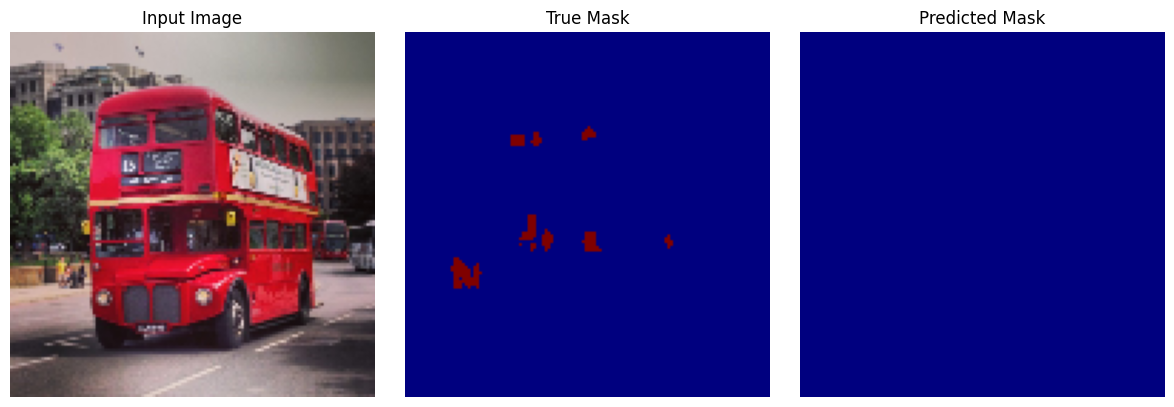

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# Get one batch
x_val, y_val = val_gen[0]

# Predict on the batch
predictions = model.predict(x_val)

# Choose one image from the batch (e.g., index 0)
index = 0
image = x_val[index]
true_mask = np.argmax(y_val[index], axis=-1)
pred_mask = np.argmax(predictions[index], axis=-1)

 #rint(true_mask)
print(np.unique(pred_mask))
print(np.unique(true_mask))

# Plot all together
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Input Image")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(true_mask, cmap='jet')
plt.title("True Mask")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(pred_mask, cmap='jet')
plt.title("Predicted Mask")
plt.axis('off')

plt.tight_layout()
plt.show()